<a href="https://colab.research.google.com/github/sangeetajay/Springboard/blob/master/Storytelling/Storytelling_SNL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Storytelling: Saturday Night Live
### 46 Years of Data: 
As a lifelong fan of Saturday Night Live, I always wished I saw more female cast members. Now, I notice that there seem to be more and that they are being featured in prominent sketches, but is it enough compared to male cast? This work will attempt to explore and visualize some of these trends. 

Data: https://www.kaggle.com/hhllcks/snldb

#### Questions to answer with this notebook:
1. How has the role of female cast members changed over the years?
2. Do cast members who can do more impressions appear on the show more frequently?
3. How do women contribute to SNL's presidential impressions?


## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
print (sns.__version__)

0.11.1


In [4]:
# setting palette to Seaborn's 'turbo'
palette = [(0.27698, 0.46153, 0.93309), (0.10738, 0.81381, 0.83484), (0.38127, 0.98909, 0.42386), (0.82333, 0.91253, 0.20663), (0.99672, 0.60977, 0.17842), (0.8538, 0.2217, 0.02677)]

In [5]:
palette

[(0.27698, 0.46153, 0.93309),
 (0.10738, 0.81381, 0.83484),
 (0.38127, 0.98909, 0.42386),
 (0.82333, 0.91253, 0.20663),
 (0.99672, 0.60977, 0.17842),
 (0.8538, 0.2217, 0.02677)]

In [6]:
#sns.palplot(sns.mpl_palette("turbo"))
sns.set_palette(palette)

In [7]:
# current path
cwd = '/content/drive/MyDrive/SNL'


## Open each csv and inspect

### actors

In [9]:
#########
# actors

act = 'actors.csv'
actors = pd.read_csv(cwd+'/'+act)
actors.head(13)
# aid actor id
# plus type of cast, guest, crew, 
# gender, male female or unknown
# I can see this being a very useful df. the URL column can probably be dropped

,aid,url,type,gender
0,Kate McKinnon,/Cast/?KaMc,cast,female
1,Alex Moffat,/Cast/?AlMo,cast,male
2,Ego Nwodim,/Cast/?EgNw,cast,unknown
3,Chris Redd,/Cast/?ChRe,cast,male
4,Kenan Thompson,/Cast/?KeTh,cast,male
5,Carey Mulligan,/Guests/?3677,guest,andy
6,Marcus Mumford,/Guests/?3679,guest,male
7,Aidy Bryant,/Cast/?AiBr,cast,female
8,Steve Higgins,/Crew/?StHi,crew,male
9,Mikey Day,/Cast/?MiDa,cast,male


### appearances

In [10]:
########
# appearances

app = 'appearances.csv'
apps = pd.read_csv(cwd+'/'+app)
apps.head(13)
# this one also looks very comprehensive
# aid, #tid is episode name, capacity says if cast, host, cameo 
# plus charid, impid, epid, sid. 
# using the gender in the actors df could be useful 

,aid,tid,capacity,role,charid,impid,voice,epid,sid
0,Kate McKinnon,202104101,cast,Joanne,NaN,NaN,False,20210410,46
1,Alex Moffat,202104101,cast,Craig Matthew Yorgensen,NaN,NaN,False,20210410,46
2,Ego Nwodim,202104101,cast,anchor,NaN,NaN,False,20210410,46
3,Chris Redd,202104101,cast,Calvin,NaN,NaN,False,20210410,46
4,Kenan Thompson,202104101,cast,anchor,NaN,NaN,False,20210410,46
5,Carey Mulligan,202104102,host,NaN,NaN,NaN,False,20210410,46
6,Marcus Mumford,202104102,cameo,NaN,NaN,NaN,False,20210410,46
7,Carey Mulligan,202104103,host,Sandra,NaN,NaN,False,20210410,46
8,Aidy Bryant,202104103,cast,Rebecca,1098.0,NaN,False,20210410,46
9,Steve Higgins,202104103,cast,announcer,NaN,NaN,True,20210410,46


In [11]:
# what is the difference between these two df's?
actors.info()
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   aid     2306 non-null   object
 1   url     2249 non-null   object
 2   type    2306 non-null   object
 3   gender  2306 non-null   object
dtypes: object(4)
memory usage: 72.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55355 entries, 0 to 55354
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   aid       55355 non-null  object 
 1   tid       55355 non-null  int64  
 2   capacity  55355 non-null  object 
 3   role      43766 non-null  object 
 4   charid    4558 non-null   float64
 5   impid     7414 non-null   float64
 6   voice     55355 non-null  bool   
 7   epid      55355 non-null  int64  
 8   sid       55355 non-null  int64  
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 3.4+ MB


In [12]:
print(actors.shape)
print(apps.shape)

(2306, 4)
(55355, 9)


In [13]:
print(len(actors.aid.unique()))
print(len(apps.aid.unique()))
# Nice! they have the same number of actors, but apps has the individual appearance for each one
# so far it looks like apps may be more useful for a storytelling task.

2306
2306


### casts

In [14]:
#######
# casts

cast = '/casts.csv'
casts = pd.read_csv(cwd+'/'+cast)
casts.head(13)

,aid,sid,featured,first_epid,last_epid,update_anchor,n_episodes,season_fraction
0,A. Whitney Brown,11,True,19860222.0,NaN,False,8,0.444444
1,A. Whitney Brown,12,True,NaN,NaN,False,20,1.000000
2,A. Whitney Brown,13,True,NaN,NaN,False,13,1.000000
3,A. Whitney Brown,14,True,NaN,NaN,False,20,1.000000
4,A. Whitney Brown,15,True,NaN,NaN,False,20,1.000000
5,A. Whitney Brown,16,True,NaN,NaN,False,20,1.000000
6,Alan Zweibel,5,True,19800409.0,NaN,False,5,0.250000
7,Sasheer Zamata,39,True,20140118.0,NaN,False,11,0.523810
8,Sasheer Zamata,40,True,NaN,NaN,False,21,1.000000
9,Sasheer Zamata,41,False,NaN,NaN,False,21,1.000000


In [15]:
print(casts.shape)
casts.info()

# interesting columns: sid, featured, update anchor
# n_episodes, season_fraction

(614, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   aid              614 non-null    object 
 1   sid              614 non-null    int64  
 2   featured         614 non-null    bool   
 3   first_epid       50 non-null     float64
 4   last_epid        17 non-null     float64
 5   update_anchor    614 non-null    bool   
 6   n_episodes       614 non-null    int64  
 7   season_fraction  614 non-null    float64
dtypes: bool(2), float64(3), int64(2), object(1)
memory usage: 30.1+ KB


Text(0, 0.5, '# of Cast Members')

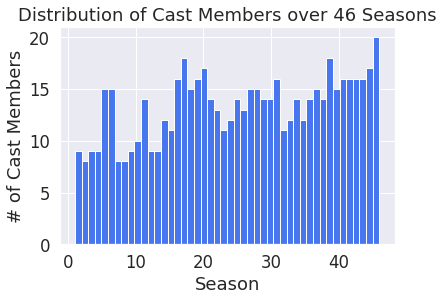

In [174]:
casts.sid.hist(bins=46)
plt.title('Distribution of Cast Members over 46 Seasons')
plt.xlabel('Season')
plt.ylabel('# of Cast Members')
# sid is season id
# not much variation here over time, but a slight increase with time

Text(0.5, 0, 'Fraction of Season')

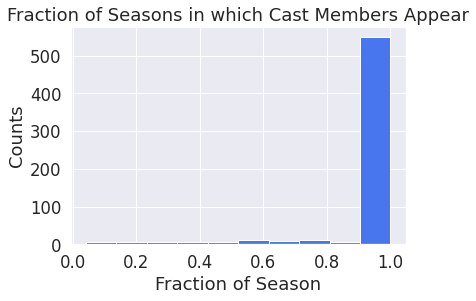

In [171]:
casts.season_fraction.hist()
plt.title('Fraction of Seasons in which Cast Members Appear')
plt.ylabel('Counts')
plt.xlabel('Fraction of Season')
# most cast members are in 100% of the season, this is good, but this may not be a very useful column 

In [18]:
casts.aid.value_counts()
# this gives the number of seasons of each cast member

Kenan Thompson       18
Darrell Hammond      14
Seth Meyers          13
Fred Armisen         11
Al Franken           11
                     ..
Pamela Stephenson     1
Andrew Dismukes       1
Gilbert Gottfried     1
Jim Downey            1
Sarah Silverman       1
Name: aid, Length: 156, dtype: int64

### characters

In [19]:
char = 'characters.csv'
characters = pd.read_csv(cwd+'/'+char)
characters.head()
# charid is a number for character ID
# aid is actor id


,charid,aid,name
0,1098,Aidy Bryant,Rebecca
1,1087,Kenan Thompson,Elliott Pants
2,1079,Kate McKinnon,Vaneta Starkie
3,1080,Aidy Bryant,Wylene Starkie
4,1024,Alex Moffat,Guy Who Just Bought a Boat


### impressions

In [20]:
imp_file = 'impressions.csv'
imp = pd.read_csv(cwd+'/'+imp_file)
imp.sample(13)
# impid is impression id
# aid is actor id

,impid,aid,name
2118,2084,Al Gore,Trent Lott
697,3526,Bobby Moynihan,Lance Ito
3712,343,Eddie Murphy,James Brown (I)
3874,248,Charles Rocket,Ronald Reagan
1037,3209,Nasim Pedrad,"Mercedes ""MJ"" Javid"
2522,1650,Will Ferrell,Bob Livingston
3853,293,Joe Piscopo,Allen Funt
2826,1337,David Koechner,Pat Buchanan
1118,3134,Nasim Pedrad,Maria Bartiromo
4032,111,Jane Curtin,Grace Kelly


In [21]:
print(imp.shape)
imp.info()
# name is name of the character

(4115, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   impid   4115 non-null   int64 
 1   aid     4115 non-null   object
 2   name    4115 non-null   object
dtypes: int64(1), object(2)
memory usage: 96.6+ KB


In [22]:
# what is difference between characters and impressions?
print(characters.shape)
print(imp.shape)

# why are there more impressions than characters

(1099, 3)
(4115, 3)


### seasons

In [23]:
seas = 'seasons.csv'
seasons = pd.read_csv(cwd+'/'+seas)
seasons.head()
# sid is season id
# not incredibly useful info, maybe the year column 

,sid,year,first_epid,last_epid,n_episodes
0,1,1975,19751011,19760731,24
1,2,1976,19760918,19770521,22
2,3,1977,19770924,19780520,20
3,4,1978,19781007,19790526,20
4,5,1979,19791013,19800524,20


In [24]:
list_of_dfs = [actors, apps, casts, characters, imp, seasons]

In [25]:
for d in list_of_dfs:
    print(d.shape, d.columns)

(2306, 4) Index(['aid', 'url', 'type', 'gender'], dtype='object')
(55355, 9) Index(['aid', 'tid', 'capacity', 'role', 'charid', 'impid', 'voice', 'epid',
       'sid'],
      dtype='object')
(614, 8) Index(['aid', 'sid', 'featured', 'first_epid', 'last_epid', 'update_anchor',
       'n_episodes', 'season_fraction'],
      dtype='object')
(1099, 3) Index(['charid', 'aid', 'name'], dtype='object')
(4115, 3) Index(['impid', 'aid', 'name'], dtype='object')
(46, 5) Index(['sid', 'year', 'first_epid', 'last_epid', 'n_episodes'], dtype='object')


In [26]:
######################
######################

## Opening and Cleaning the Main df: appearances

In [27]:
##########################################

# lets try just opening the biggest csv file, apps
apps.sample(13)

,aid,tid,capacity,role,charid,impid,voice,epid,sid
39278,Mike Myers,1991020910,cast,Steve,NaN,NaN,False,19910209,16
29295,Ana Gasteyer,1999050815,cast,Martha Stewart,NaN,1404.0,False,19990508,24
43541,Nora Dunn,198610118,cast,Ann Landers,NaN,570.0,False,19861011,12
54374,Howard Johnson,1976022810,cast,NaN,NaN,NaN,False,19760228,1
30693,Will Ferrell,199802144,cast,Marty Culp,450.0,NaN,False,19980214,23
51032,Gilda Radner,1978101410,cast,Bobbi Farber,20.0,NaN,False,19781014,4
17926,Kristen Wiig,2009013111,cast,Trina,780.0,NaN,False,20090131,34
17401,Bobby Moynihan,200905092,cast,NaN,NaN,NaN,False,20090509,34
8957,Colin Jost,201502289,cast,NaN,NaN,NaN,False,20150228,40
9523,Kyle Mooney,2014111511,cast,Tom,NaN,NaN,False,20141115,40


In [28]:
# so there are 2306 unique actors spanning over 55,355 appearances. in different capacities
len(apps.aid.unique())

2306

In [29]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55355 entries, 0 to 55354
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   aid       55355 non-null  object 
 1   tid       55355 non-null  int64  
 2   capacity  55355 non-null  object 
 3   role      43766 non-null  object 
 4   charid    4558 non-null   float64
 5   impid     7414 non-null   float64
 6   voice     55355 non-null  bool   
 7   epid      55355 non-null  int64  
 8   sid       55355 non-null  int64  
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 3.4+ MB


In [30]:
# all of the 'id's should be object/string

apps[['aid', 'tid', 'charid', 'impid', 'epid']] = apps[['aid', 'tid', 'charid', 'impid', 'epid']].astype(str)


In [31]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55355 entries, 0 to 55354
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aid       55355 non-null  object
 1   tid       55355 non-null  object
 2   capacity  55355 non-null  object
 3   role      43766 non-null  object
 4   charid    55355 non-null  object
 5   impid     55355 non-null  object
 6   voice     55355 non-null  bool  
 7   epid      55355 non-null  object
 8   sid       55355 non-null  int64 
dtypes: bool(1), int64(1), object(7)
memory usage: 3.4+ MB


In [32]:
apps.capacity.value_counts()

cast       43986
host        6931
music       2051
cameo       1559
filmed       442
guest        207
other        123
unknown       56
Name: capacity, dtype: int64

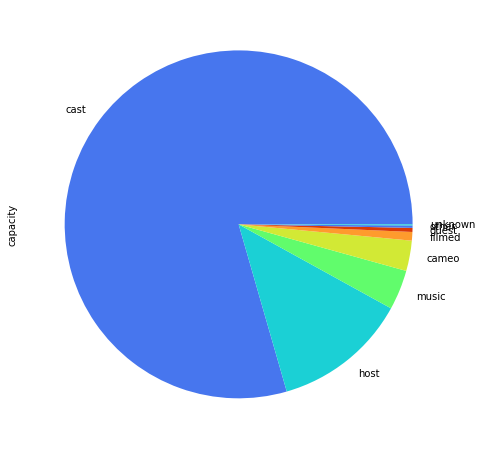

In [33]:
apps.capacity.value_counts().plot(kind='pie', figsize=(8,8))

In [34]:
# let's check the 'unknown'
apps[apps.capacity=='unknown']

,aid,tid,capacity,role,charid,impid,voice,epid,sid
8037,Don Roy King,201511142,unknown,NaN,nan,nan,False,20151114,41
11831,Adam Epstein,201303025,unknown,announcer,nan,nan,True,20130302,38
12123,Adam Epstein,201301193,unknown,announcer,nan,nan,True,20130119,38
12749,Adam Epstein,201209153,unknown,announcer,nan,nan,True,20120915,38
12902,Adam Epstein,201205123,unknown,announcer,nan,nan,True,20120512,37
32608,John Henry Kurtz,199605181,unknown,announcer,nan,nan,True,19960518,21
32910,John Henry Kurtz,1996032311,unknown,announcer,nan,nan,True,19960323,21
33707,John Henry Kurtz,199509301,unknown,announcer,nan,nan,True,19950930,21
33830,John Henry Kurtz,199505063,unknown,announcer,nan,nan,True,19950506,20
34161,John Henry Kurtz,199502259,unknown,announcer,nan,nan,True,19950225,20


In [35]:
# let's check the 'unknown'
apps[apps.capacity=='unknown'].aid.unique()

array(['Don Roy King', 'Adam Epstein', 'John Henry Kurtz', 'Joel Godard',
       'Jackson Beck'], dtype=object)

In [36]:
# let's check the 'unknown'
apps[apps.capacity=='unknown'].role.unique()


array([nan, 'announcer', 'narrator', 'film narrator', 'epilogue narrator'],
      dtype=object)

In [37]:
# mostly announcer or narrator.... lets just replace 'unknown' with either announcer or narrator.
# dan roy kind has been the director of snl since 2006

In [38]:
apps.capacity = apps.capacity.replace('unknown', 'narrator/announcer')


In [39]:
apps.capacity.value_counts()

cast                  43986
host                   6931
music                  2051
cameo                  1559
filmed                  442
guest                   207
other                   123
narrator/announcer       56
Name: capacity, dtype: int64

In [40]:
apps[apps.capacity=='other']

,aid,tid,capacity,role,charid,impid,voice,epid,sid
25051,Jack Handey,2003021514,other,NaN,nan,nan,False,20030215,28
25433,Jack Handey,2002111613,other,NaN,nan,nan,False,20021116,28
25592,Jack Handey,2002101911,other,NaN,nan,nan,False,20021019,28
25899,Jack Handey,2002051114,other,NaN,nan,nan,False,20020511,27
25977,Jack Handey,2002042015,other,NaN,nan,nan,False,20020420,27
...,...,...,...,...,...,...,...,...,...
39279,Jack Handey,1991020911,other,NaN,nan,nan,False,19910209,16
39321,Jack Handey,199101197,other,NaN,nan,nan,False,19910119,16
39329,Jack Handey,199101199,other,NaN,nan,nan,False,19910119,16
39339,Jack Handey,1991011913,other,NaN,nan,nan,False,19910119,16


In [41]:
apps[apps.capacity=='other'].aid.unique()

array(['Jack Handey'], dtype=object)

In [42]:
apps.capacity = apps.capacity.replace('other', 'narrator/announcer')
apps.capacity.value_counts()

cast                  43986
host                   6931
music                  2051
cameo                  1559
filmed                  442
guest                   207
narrator/announcer      179
Name: capacity, dtype: int64

In [43]:
# how are guest and cameo different?
# change all guests to cameo
print(apps[apps.capacity=='guest'].role.unique())
print(apps[apps.capacity=='cameo'].role.unique())

[nan 'Bernard' 'Captain Kidd' 'Hare' 'Wayne Little' 'Jim Preston'
 'Bob Dole' 'Elwood Blues' 'Irwin Mainway' 'Ernesto' 'Ron Wood'
 'Sister Maria' 'Therese Decastiglione' 'George Bush' 'Charles Grodin'
 'Tom Snyder' 'Rush Limbaugh' 'Robert Stack' 'miner' 'Hillary Clinton'
 "Curley's wife" 'Father Guido Sarducci' 'Jean Marsh' 'Mary Jo Buttafuoco'
 'Ellen' "Sinead O'Connor" 'Mia Farrow' 'Angelo Brignara' 'Carl'
 'Golda Meir' 'Princess Paulina' 'trekkie' 'patron' 'Dave' 'Mars Blackmon'
 'butler' 'marine' 'Ted' 'Jody Hagler' 'Fernando Lamas' 'Carlo Zambini'
 "W. Barrington D'Arcy" 'Topol' 'Elvis' 'Queen Elizabeth' 'Farrah Fawcett'
 'Crystal' 'Ernestine' 'guy' 'Judith Beasley' 'Susie' 'Tess DiSenzo'
 'Ricky Ricardo' 'Youngblood' 'Bingo Futaba' 'Dwayne Christiansen' 'Polly'
 'priest' 'dancer']
[nan 'Doug Emhoff' 'Kamala Harris' 'Donald Trump' 'Joe Biden' 'executive'
 'Aunt Jemima' 'Lady Liberty' 'Kristen Welker' 'Blanche' 'Caviar' 'wife'
 'Debbie Downer' 'Mike Bloomberg' 'Bernie Sanders' 'Amy

In [44]:
# change guest to cameo since they seem to be same thing
apps.capacity = apps.capacity.replace('guest', 'cameo')

In [45]:
# theres only 6 actors with unknown roles or capacities, this can be googled. 

In [46]:
# let's check the 'unknown'
apps[apps.capacity=='cast'].role.unique()

array(['Joanne', 'Craig Matthew Yorgensen', 'anchor', ..., 'Mr. Kromer',
       'Harvey Morgomaster', 'Mrs. Kromer'], dtype=object)

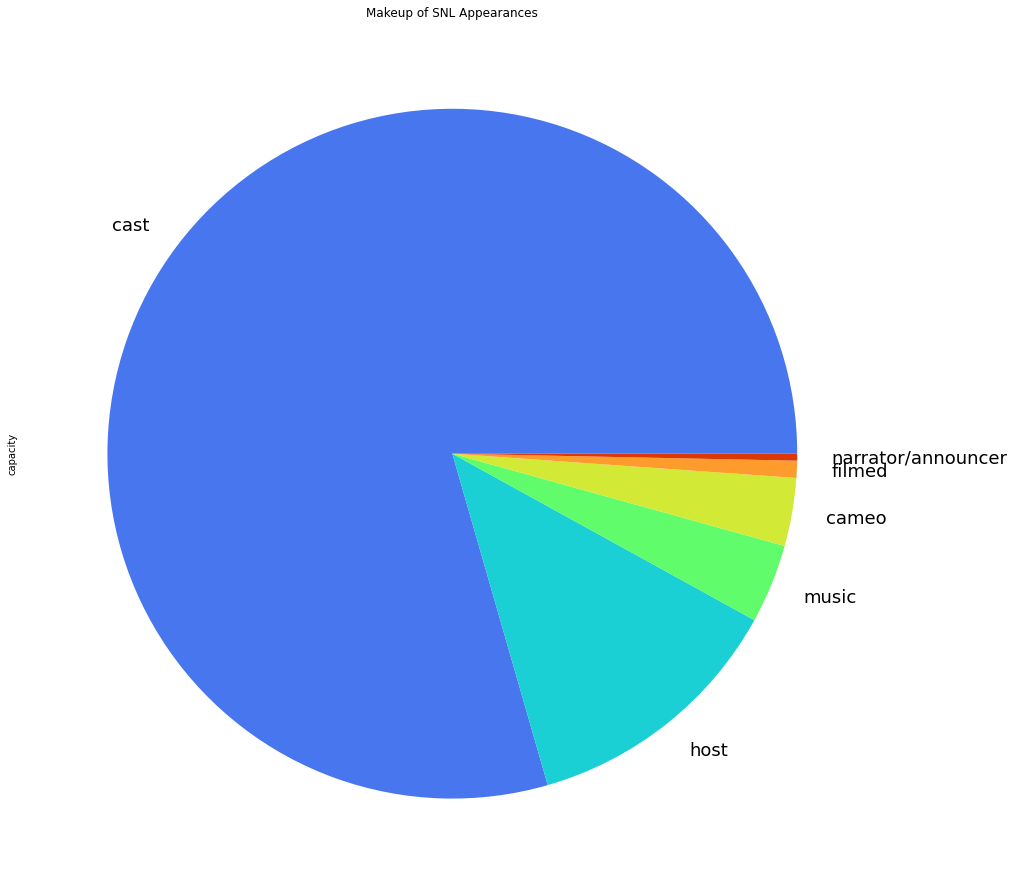

In [47]:
apps.capacity.value_counts().plot(kind='pie', figsize=(14,14), fontsize=18)
plt.tight_layout()
plt.title('Makeup of SNL Appearances')
plt.show()

cast members make up the majority of appearances... this makes sense.

In [48]:
apps.capacity.value_counts()

cast                  43986
host                   6931
music                  2051
cameo                  1766
filmed                  442
narrator/announcer      179
Name: capacity, dtype: int64

In [49]:
apps.head()

,aid,tid,capacity,role,charid,impid,voice,epid,sid
0,Kate McKinnon,202104101,cast,Joanne,nan,nan,False,20210410,46
1,Alex Moffat,202104101,cast,Craig Matthew Yorgensen,nan,nan,False,20210410,46
2,Ego Nwodim,202104101,cast,anchor,nan,nan,False,20210410,46
3,Chris Redd,202104101,cast,Calvin,nan,nan,False,20210410,46
4,Kenan Thompson,202104101,cast,anchor,nan,nan,False,20210410,46


In [50]:
# how many appearances by each actor?
# lets check out the music performances
apps[apps.capacity=='music']

# music appearances don't have charid or impid, not actual sketches

,aid,tid,capacity,role,charid,impid,voice,epid,sid
22,Kid Cudi,202104106,music,NaN,nan,nan,False,20210410,46
28,Kid Cudi,202104107,music,NaN,nan,nan,False,20210410,46
54,Kid Cudi,2021041013,music,NaN,nan,nan,False,20210410,46
90,St. Vincent,202104037,music,NaN,nan,nan,False,20210403,46
115,St. Vincent,2021040311,music,NaN,nan,nan,False,20210403,46
...,...,...,...,...,...,...,...,...,...
55276,Phoebe Snow,1975101815,music,NaN,nan,nan,False,19751018,1
55289,Billy Preston,197510114,music,NaN,nan,nan,False,19751011,1
55302,Janis Ian,197510118,music,NaN,nan,nan,False,19751011,1
55348,Billy Preston,1975101122,music,NaN,nan,nan,False,19751011,1


In [51]:
actors.shape

(2306, 4)

In [52]:
actors.head()

,aid,url,type,gender
0,Kate McKinnon,/Cast/?KaMc,cast,female
1,Alex Moffat,/Cast/?AlMo,cast,male
2,Ego Nwodim,/Cast/?EgNw,cast,unknown
3,Chris Redd,/Cast/?ChRe,cast,male
4,Kenan Thompson,/Cast/?KeTh,cast,male


In [53]:
actors.type.value_counts()

guest      1926
crew        170
cast        154
unknown      56
Name: type, dtype: int64

### Conclusion on this section: Based on the makeup of people who have the majority of the 'appearances' on tv, cast members... For the rest of this study, I will focus on cast members.


# 1. How has the role of women changed at SNL?

Appearences by female cast members?

Since cast members make up the overwhelming majority of people in the sketches, lets only focus on 'cast'


#### Preliminary EDA

In [54]:
apps.head()

,aid,tid,capacity,role,charid,impid,voice,epid,sid
0,Kate McKinnon,202104101,cast,Joanne,nan,nan,False,20210410,46
1,Alex Moffat,202104101,cast,Craig Matthew Yorgensen,nan,nan,False,20210410,46
2,Ego Nwodim,202104101,cast,anchor,nan,nan,False,20210410,46
3,Chris Redd,202104101,cast,Calvin,nan,nan,False,20210410,46
4,Kenan Thompson,202104101,cast,anchor,nan,nan,False,20210410,46


In [55]:
#how many unique values in aid for apps and actors?
print(len(apps.aid.unique()))
print(len(actors.aid.unique()))

2306
2306


In [56]:
# We are going to merge the actors df to the apps df because we want the gender:
# first we need to fill in the unknowns
actors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   aid     2306 non-null   object
 1   url     2249 non-null   object
 2   type    2306 non-null   object
 3   gender  2306 non-null   object
dtypes: object(4)
memory usage: 72.2+ KB


In [57]:
#what is the type?
actors.type.value_counts()
# seems similar to capacity from the other df, but lets keep it for now

guest      1926
crew        170
cast        154
unknown      56
Name: type, dtype: int64

In [58]:
# drop the url column
actors = actors.drop(columns=['url'], axis =1)
actors.head()

,aid,type,gender
0,Kate McKinnon,cast,female
1,Alex Moffat,cast,male
2,Ego Nwodim,cast,unknown
3,Chris Redd,cast,male
4,Kenan Thompson,cast,male


In [59]:
actors_cast = actors[actors['type']=='cast']
actors_cast.head()

,aid,type,gender
0,Kate McKinnon,cast,female
1,Alex Moffat,cast,male
2,Ego Nwodim,cast,unknown
3,Chris Redd,cast,male
4,Kenan Thompson,cast,male


In [60]:
# lets fill in the unknown genders manually
actors_cast[actors_cast['gender']=='unknown']

,aid,type,gender
2,Ego Nwodim,cast,unknown
20,Punkie Johnson,cast,unknown


In [61]:
actors_cast.gender = actors_cast.gender.replace(['unknown'], ['female'])

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [62]:
actors_cast.head()

,aid,type,gender
0,Kate McKinnon,cast,female
1,Alex Moffat,cast,male
2,Ego Nwodim,cast,female
3,Chris Redd,cast,male
4,Kenan Thompson,cast,male


In [63]:
actors_cast

,aid,type,gender
0,Kate McKinnon,cast,female
1,Alex Moffat,cast,male
2,Ego Nwodim,cast,female
3,Chris Redd,cast,male
4,Kenan Thompson,cast,male
...,...,...,...
2048,Peter Aykroyd,cast,male
2049,Jane Curtin,cast,female
2051,Laraine Newman,cast,female
2054,Gilda Radner,cast,female


In [64]:
appear = pd.merge(apps, actors_cast, how='left', on='aid')
appear.head()

,aid,tid,capacity,role,charid,impid,voice,epid,sid,type,gender
0,Kate McKinnon,202104101,cast,Joanne,nan,nan,False,20210410,46,cast,female
1,Alex Moffat,202104101,cast,Craig Matthew Yorgensen,nan,nan,False,20210410,46,cast,male
2,Ego Nwodim,202104101,cast,anchor,nan,nan,False,20210410,46,cast,female
3,Chris Redd,202104101,cast,Calvin,nan,nan,False,20210410,46,cast,male
4,Kenan Thompson,202104101,cast,anchor,nan,nan,False,20210410,46,cast,male


In [65]:
appear.info()
# tid is the sketch, and aid is actor. we only care about these and sid and gender. drop all else

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55355 entries, 0 to 55354
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aid       55355 non-null  object
 1   tid       55355 non-null  object
 2   capacity  55355 non-null  object
 3   role      43766 non-null  object
 4   charid    55355 non-null  object
 5   impid     55355 non-null  object
 6   voice     55355 non-null  bool  
 7   epid      55355 non-null  object
 8   sid       55355 non-null  int64 
 9   type      40430 non-null  object
 10  gender    40430 non-null  object
dtypes: bool(1), int64(1), object(9)
memory usage: 4.7+ MB


In [66]:
appear.capacity.unique()

array(['cast', 'host', 'cameo', 'music', 'filmed', 'narrator/announcer'],
      dtype=object)

In [67]:
appear = appear.drop(columns=[ 'role', 'charid', 'voice','epid', 'type'], axis=1)
appear.head()

,aid,tid,capacity,impid,sid,gender
0,Kate McKinnon,202104101,cast,nan,46,female
1,Alex Moffat,202104101,cast,nan,46,male
2,Ego Nwodim,202104101,cast,nan,46,female
3,Chris Redd,202104101,cast,nan,46,male
4,Kenan Thompson,202104101,cast,nan,46,male


In [68]:
castonly = appear[appear.capacity=='cast']

In [69]:
castonly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43986 entries, 0 to 55353
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aid       43986 non-null  object
 1   tid       43986 non-null  object
 2   capacity  43986 non-null  object
 3   impid     43986 non-null  object
 4   sid       43986 non-null  int64 
 5   gender    39413 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.3+ MB


In [70]:
castonly.head(10)

,aid,tid,capacity,impid,sid,gender
0,Kate McKinnon,202104101,cast,nan,46,female
1,Alex Moffat,202104101,cast,nan,46,male
2,Ego Nwodim,202104101,cast,nan,46,female
3,Chris Redd,202104101,cast,nan,46,male
4,Kenan Thompson,202104101,cast,nan,46,male
8,Aidy Bryant,202104103,cast,nan,46,female
9,Steve Higgins,202104103,cast,nan,46,NaN
10,Chris Redd,202104103,cast,nan,46,male
11,Kenan Thompson,202104103,cast,nan,46,male
13,Aidy Bryant,202104104,cast,nan,46,female


Text(0, 0.5, '# of Sketches')

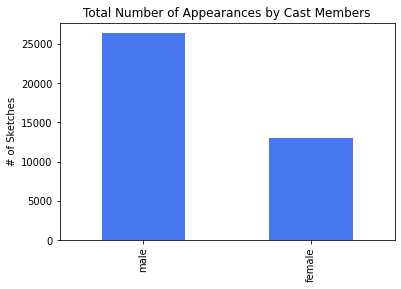

In [71]:
s = castonly['gender'].value_counts()

s.plot.bar()
plt.title('Total Number of Appearances by Cast Members')
plt.ylabel('# of Sketches')

#### Conclusion from graph:
There is an overwhelmingly higher number of appearances by males than females over the 46 seasons of shows. 

#### Let's look at the top 10 individual cast members

In [72]:
top10 = castonly.aid.value_counts().head(10)
top10

Kenan Thompson     1452
Phil Hartman       1067
Darrell Hammond    1042
Fred Armisen        856
Bill Hader          821
Cecily Strong       811
Kate McKinnon       789
Bobby Moynihan      775
Amy Poehler         756
Beck Bennett        743
Name: aid, dtype: int64

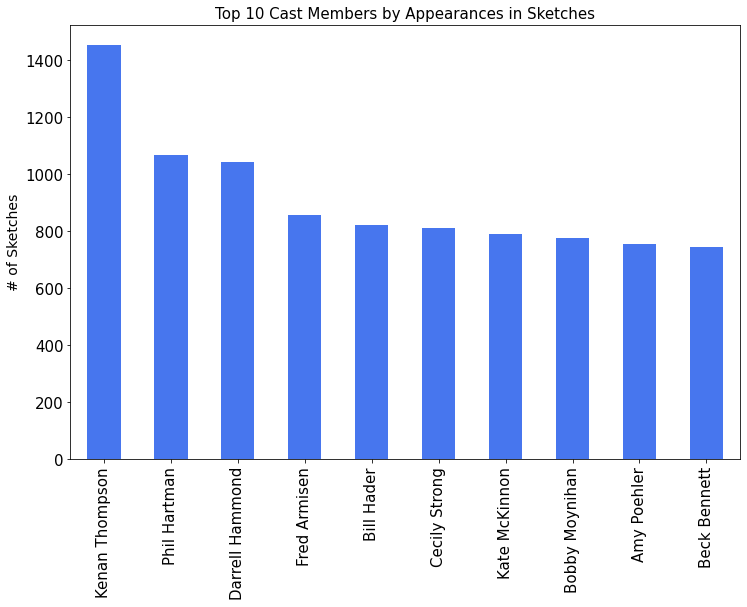

In [73]:
top10.plot(kind = "bar", fontsize = 15, figsize=(12,8))
plt.title("Top 10 Cast Members by Appearances in Sketches", fontsize = 15)
plt.ylabel("# of Sketches", fontsize = 14)
plt.show()

[(0.27698, 0.46153, 0.93309), (0.10738, 0.81381, 0.83484), (0.38127, 0.98909, 0.42386), (0.82333, 0.91253, 0.20663), (0.99672, 0.60977, 0.17842), (0.8538, 0.2217, 0.02677)]


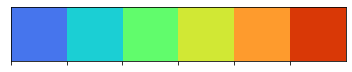

In [74]:
pal = sns.color_palette()
print(pal)
sns.palplot(pal)

In [75]:
print(pal[0])

(0.27698, 0.46153, 0.93309)


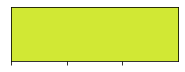

In [76]:
sns.palplot(pal[3])

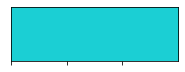

In [77]:
sns.palplot(pal[1])

In [78]:
t = pal[3]
b = pal[1]

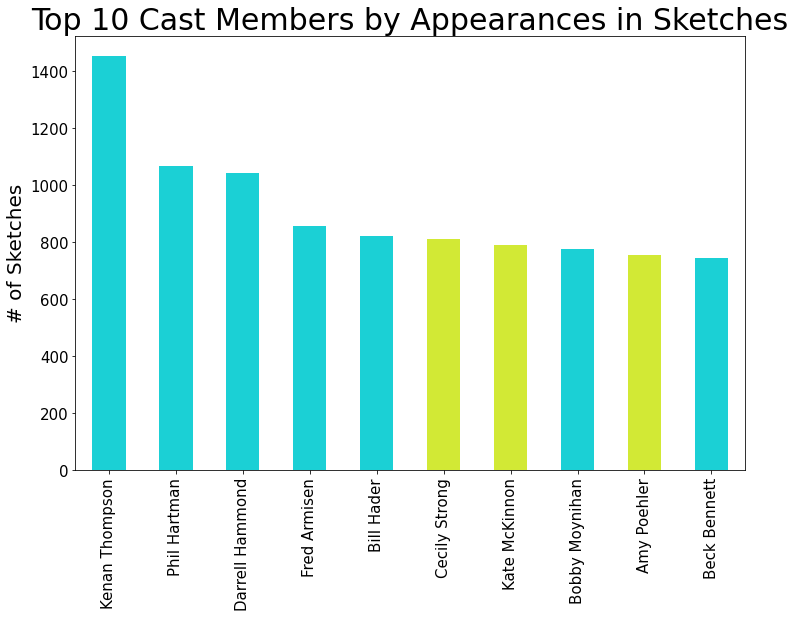

In [79]:
# plotting the males as teal and females as yellow

c = [b,b,b,b,b, t,t, b,t, b ]
 

barlist = top10.plot.bar(x=[0], y=[1], fontsize = 15, figsize=(12,8), color=c)
plt.title("Top 10 Cast Members by Appearances in Sketches", fontsize = 30)
plt.ylabel("# of Sketches", fontsize = 20)
#barlist[0].set_color('r')
plt.show()    
    
    #bar plot
#plt.bar(x, height = h, color = c)
 
#plt.show()

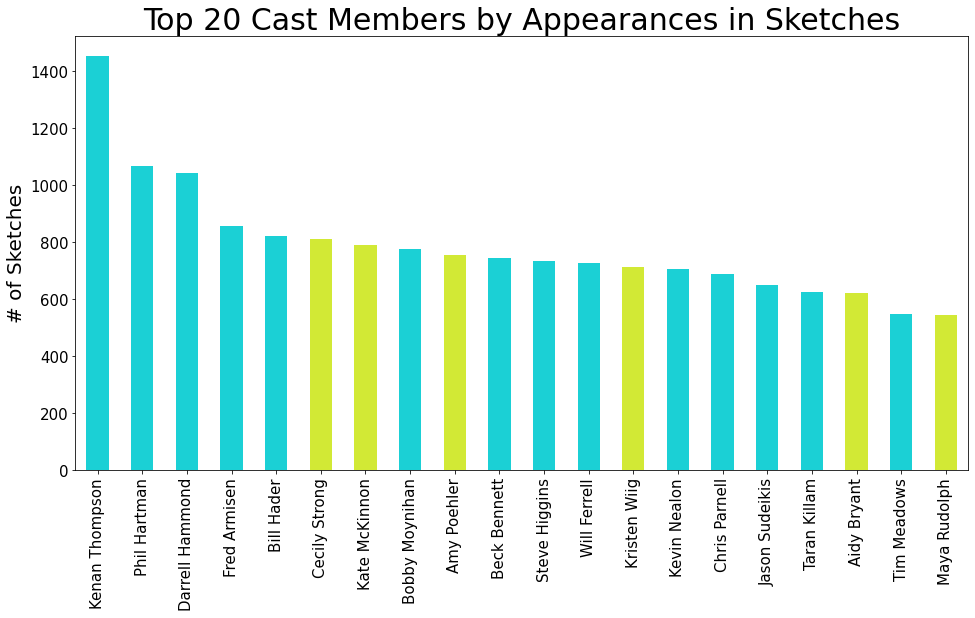

In [80]:
top20 = castonly.aid.value_counts().head(20)
top20

c = [b,b,b,b,b, t,t, b,t, b,b,b,t,b,b,b,b, t,b,t ]
 

barlist = top20.plot.bar(x=[0], y=[1], fontsize = 15, figsize=(16,8), color=c)
plt.title("Top 20 Cast Members by Appearances in Sketches", fontsize = 30)
plt.ylabel("# of Sketches", fontsize = 20)
#barlist[0].set_color('r')
plt.show()  

#### Now let's plot the appearances to compare male and female in each season

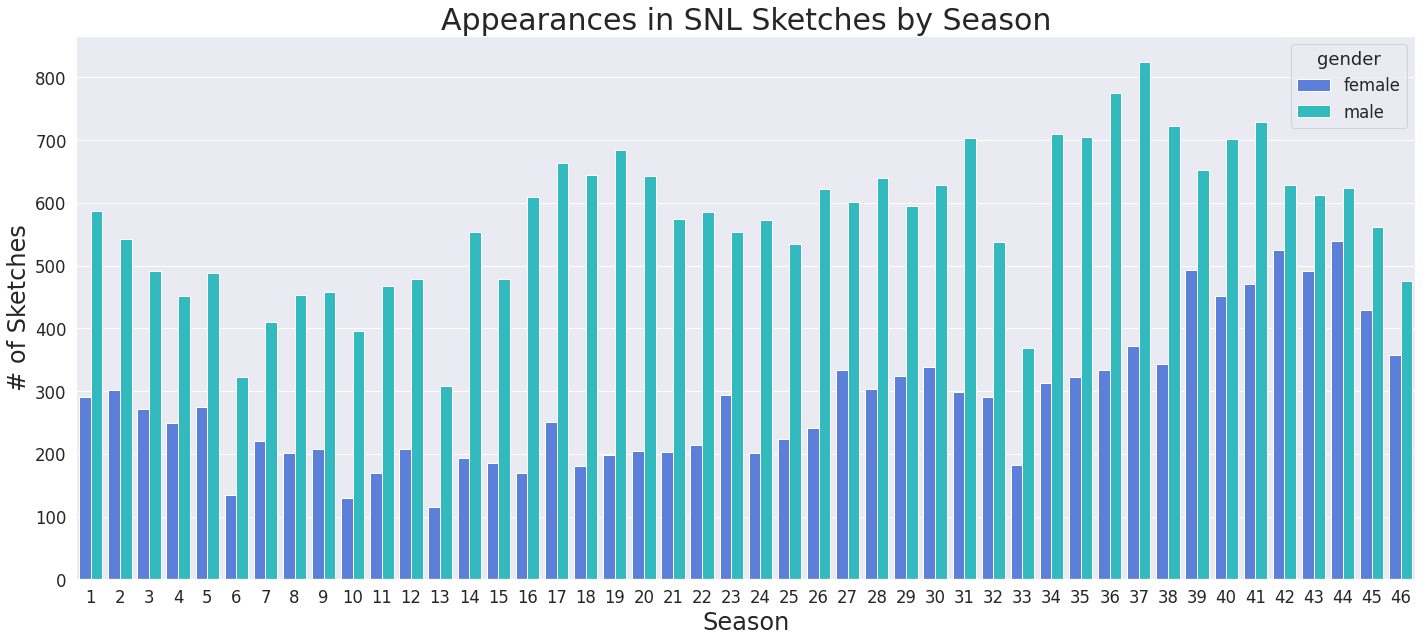

In [81]:

plt.figure(figsize=(24,10))
sns.set(font_scale=1.5, palette=palette)
sns.countplot(data = castonly, x = "sid", hue = "gender")
plt.title("Appearances in SNL Sketches by Season", fontsize = 30)
plt.xlabel('Season', fontsize=24)
plt.ylabel('# of Sketches', fontsize=24)
plt.show()

In [82]:
# lets group by gender and season id so we can stack the bar plot
df_plot = castonly.groupby(['gender', 'sid']).size().reset_index().pivot(columns='gender', index='sid', values=0)
df_plot.head()

gender,female,male
sid,,
1,291,587
2,301,543
3,271,491
4,249,451
5,275,488


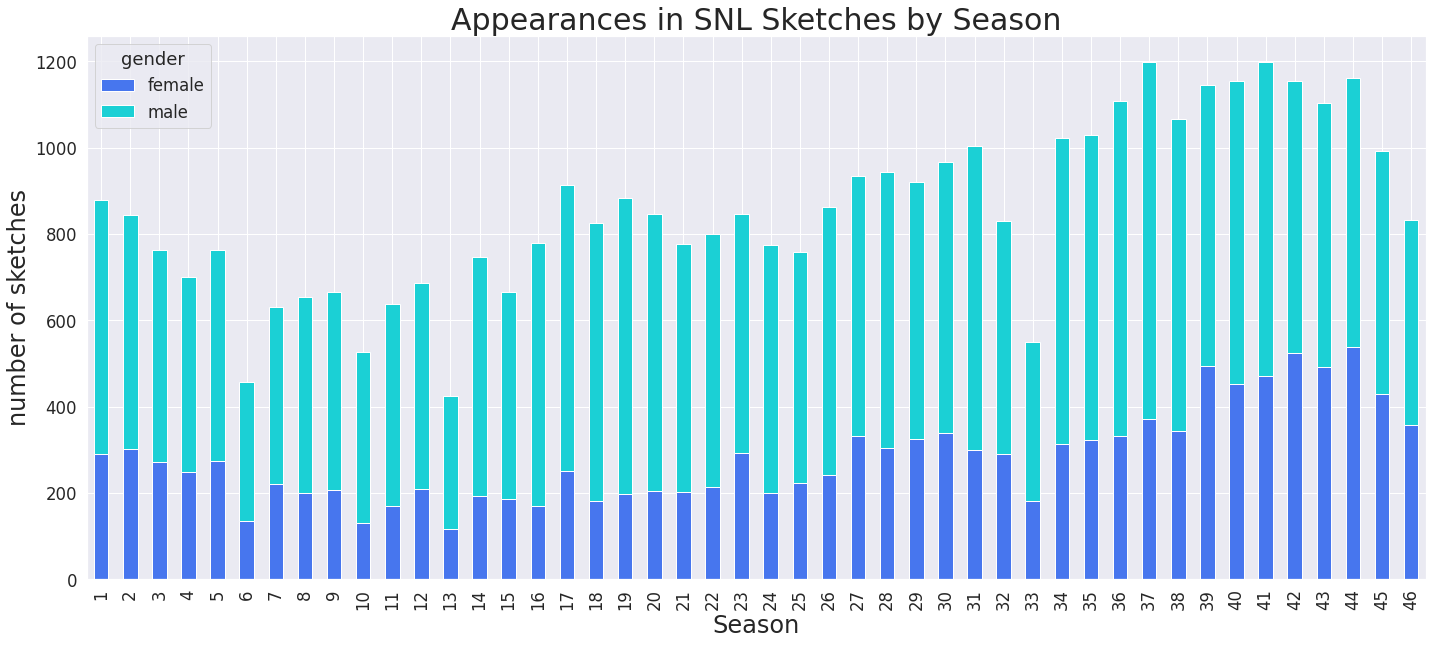

In [83]:
# Lets try stacking the bar plot from above: 
df_plot.plot(kind='bar', stacked=True, figsize=(24,10)) 
sns.set_palette(palette)
plt.title("Appearances in SNL Sketches by Season", fontsize = 30)
plt.xlabel('Season', fontsize=24)
plt.ylabel('number of sketches', fontsize=24)
plt.show()

In [84]:
df_plot.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46],
           dtype='int64', name='sid')

In [85]:
df_plot[df_plot.index==1][['female','male']]

gender,female,male
sid,,
1,291,587


In [86]:
df_plot[df_plot.index==23][['female','male']]

gender,female,male
sid,,
23,293,554


In [87]:
df_plot[df_plot.index==46][['female','male']]

gender,female,male
sid,,
46,357,475


In [88]:
seasons[seasons.index==22]

,sid,year,first_epid,last_epid,n_episodes
22,23,1997,19970927,19980509,20


In [89]:
seasons[seasons.index==45]

,sid,year,first_epid,last_epid,n_episodes
45,46,2020,20201003,20210410,17


In [90]:
df_plot.head()

gender,female,male
sid,,
1,291,587
2,301,543
3,271,491
4,249,451
5,275,488


#### Conclusion from section 1: 
Overall we can see that women are far outnumbered by men in appearing in sketches. The promising trend from plotting across 46 seasons is that the percentage of women does seem to be increasing with time.

# 2. Does the number of impressions a cast member can do affect the number of sketches in which they appear?

#### actors and imp

In [92]:
actors_cast # a df that has the 154 cast members and their genders

,aid,type,gender
0,Kate McKinnon,cast,female
1,Alex Moffat,cast,male
2,Ego Nwodim,cast,female
3,Chris Redd,cast,male
4,Kenan Thompson,cast,male
...,...,...,...
2048,Peter Aykroyd,cast,male
2049,Jane Curtin,cast,female
2051,Laraine Newman,cast,female
2054,Gilda Radner,cast,female


In [93]:
imp.head()

,impid,aid,name
0,4142,Chris Redd,Barack Obama
1,4143,Beck Bennett,Bruce Springsteen
2,4141,Pete Davidson,Matt Gaetz
3,4057,Chloe Fineman,Britney Spears
4,4140,Chris Redd,Lil Nas X


In [94]:
imp.shape

(4115, 3)

In [95]:
imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   impid   4115 non-null   int64 
 1   aid     4115 non-null   object
 2   name    4115 non-null   object
dtypes: int64(1), object(2)
memory usage: 96.6+ KB


In [96]:
#convert impid to object
imp.impid = imp.impid.astype(str)
imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   impid   4115 non-null   object
 1   aid     4115 non-null   object
 2   name    4115 non-null   object
dtypes: object(3)
memory usage: 96.6+ KB


In [97]:
print(len(imp.impid.unique()))
print(len(imp.aid.unique()))
print(len(imp.name.unique()))

4115
473
2854


In [98]:
# There are 4,115 unique impid's !!! 
# There are 473 actors doing 2854 impressions

In [99]:
# lets merge imp df with actors_cast df
print(imp.shape)
imp.head()

(4115, 3)


,impid,aid,name
0,4142,Chris Redd,Barack Obama
1,4143,Beck Bennett,Bruce Springsteen
2,4141,Pete Davidson,Matt Gaetz
3,4057,Chloe Fineman,Britney Spears
4,4140,Chris Redd,Lil Nas X


In [100]:
print(actors_cast.shape)
actors_cast.head()

(154, 3)


,aid,type,gender
0,Kate McKinnon,cast,female
1,Alex Moffat,cast,male
2,Ego Nwodim,cast,female
3,Chris Redd,cast,male
4,Kenan Thompson,cast,male


In [101]:
imp_gen = pd.merge(imp, actors_cast, how='left', on='aid')

In [102]:
print(imp_gen.shape)
imp_gen.head(13)


(4115, 5)


,impid,aid,name,type,gender
0,4142,Chris Redd,Barack Obama,cast,male
1,4143,Beck Bennett,Bruce Springsteen,cast,male
2,4141,Pete Davidson,Matt Gaetz,cast,male
3,4057,Chloe Fineman,Britney Spears,cast,female
4,4140,Chris Redd,Lil Nas X,cast,male
5,2258,Maya Rudolph,Beyoncé,cast,female
6,4134,Mikey Day,Sean Evans,cast,male
7,4005,Maya Rudolph,Kamala Harris,cast,female
8,4135,Martin Short,Doug Emhoff,cast,male
9,4121,Aidy Bryant,Ted Cruz,cast,female


In [103]:
# code from above
castonly = appear[appear.capacity=='cast']

In [104]:
castonly

,aid,tid,capacity,impid,sid,gender
0,Kate McKinnon,202104101,cast,nan,46,female
1,Alex Moffat,202104101,cast,nan,46,male
2,Ego Nwodim,202104101,cast,nan,46,female
3,Chris Redd,202104101,cast,nan,46,male
4,Kenan Thompson,202104101,cast,nan,46,male
...,...,...,...,...,...,...
55349,Dan Aykroyd,1975101123,cast,nan,1,male
55350,John Belushi,1975101123,cast,nan,1,male
55351,Garrett Morris,1975101123,cast,nan,1,male
55352,Gilda Radner,1975101123,cast,nan,1,female


In [105]:
castonly.info()
#how many with nan

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43986 entries, 0 to 55353
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aid       43986 non-null  object
 1   tid       43986 non-null  object
 2   capacity  43986 non-null  object
 3   impid     43986 non-null  object
 4   sid       43986 non-null  int64 
 5   gender    39413 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.3+ MB


In [106]:
# cast appearances where impid is not 'nan'
cast_impress = castonly[castonly['impid']!='nan']
cast_impress

,aid,tid,capacity,impid,sid,gender
32,Chris Redd,202104108,cast,4142.0,46,male
33,Beck Bennett,202104108,cast,4143.0,46,male
62,Pete Davidson,202104031,cast,4141.0,46,male
64,Chloe Fineman,202104031,cast,4057.0,46,female
66,Chris Redd,202104031,cast,4140.0,46,male
...,...,...,...,...,...,...
55062,Chevy Chase,197511158,cast,5.0,1,male
55066,John Belushi,197511159,cast,6.0,1,male
55104,Chevy Chase,197511081,cast,3.0,1,male
55189,Laraine Newman,197510257,cast,1.0,1,female


In [107]:
cast_impress.info() # why are there unknowns for gender?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6523 entries, 32 to 55204
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aid       6523 non-null   object
 1   tid       6523 non-null   object
 2   capacity  6523 non-null   object
 3   impid     6523 non-null   object
 4   sid       6523 non-null   int64 
 5   gender    6448 non-null   object
dtypes: int64(1), object(5)
memory usage: 356.7+ KB


In [108]:
cast_impress.gender.unique() # what are the nans

array(['male', 'female', nan], dtype=object)

In [109]:
print(len(cast_impress[cast_impress['gender'].isna()].aid.unique()))
cast_impress[cast_impress['gender'].isna()].aid.unique()

29


array(['Simon Rich', 'John Lutz', 'Paula Pell', 'Rich Francese',
       'Robert Carlock', 'Tom Gianas', 'Lori Nasso', 'Michael Shoemaker',
       'Steve Higgins', 'David Spade', 'Dave Attell', 'Jeff Renaudo',
       'Christine Zander', 'Spike Feresten', 'Akira Yoshimura',
       'Grafton True', 'Marc Shaiman', 'Andy Murphy', 'Don Pardo',
       'Kevin Kelton', 'Nate Herman', 'Clint Smith', 'Andrew Smith',
       'Nelson Lyon', 'Gilbert Gottfried', 'Pete Fatovich',
       'Karen Roston', 'Bruce McCall', 'Doris Powell'], dtype=object)

In [110]:
# most are male, can we easily fill in the females?
# list of females 

ladies = ['Paula Pell', 'Lori Nasso', 
       'Christine Zander', 
       'Karen Roston', 'Doris Powell']
ladies

['Paula Pell',
 'Lori Nasso',
 'Christine Zander',
 'Karen Roston',
 'Doris Powell']

In [111]:
cast_impress[cast_impress['gender'].isna()]


,aid,tid,capacity,impid,sid,gender
19278,Simon Rich,200711031,cast,2636.0,33,NaN
22268,John Lutz,2005041612,cast,2397.0,30,NaN
23157,Paula Pell,200410091,cast,2301.0,30,NaN
29562,Rich Francese,199902063,cast,1683.0,24,NaN
30553,Robert Carlock,199803071,cast,1578.0,23,NaN
...,...,...,...,...,...,...
48427,Pete Fatovich,1981011711,cast,263.0,6,NaN
50262,Karen Roston,197903103,cast,189.0,4,NaN
53469,Bruce McCall,197610306,cast,57.0,2,NaN
53936,Doris Powell,197605297,cast,37.0,1,NaN


In [112]:
for i in ladies:
    cast_impress.loc[cast_impress['aid'] == i] = cast_impress.loc[cast_impress['aid'] == i].fillna('female')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [113]:
print(len(cast_impress[cast_impress['gender'].isna()].aid.unique()))
cast_impress[cast_impress['gender'].isna()].aid.unique()

24


array(['Simon Rich', 'John Lutz', 'Rich Francese', 'Robert Carlock',
       'Tom Gianas', 'Michael Shoemaker', 'Steve Higgins', 'David Spade',
       'Dave Attell', 'Jeff Renaudo', 'Spike Feresten', 'Akira Yoshimura',
       'Grafton True', 'Marc Shaiman', 'Andy Murphy', 'Don Pardo',
       'Kevin Kelton', 'Nate Herman', 'Clint Smith', 'Andrew Smith',
       'Nelson Lyon', 'Gilbert Gottfried', 'Pete Fatovich',
       'Bruce McCall'], dtype=object)

In [114]:
cast_impress = cast_impress.fillna('male')

In [115]:
cast_impress.gender.unique()

array(['male', 'female'], dtype=object)

In [116]:
cast_impress.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6523 entries, 32 to 55204
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aid       6523 non-null   object
 1   tid       6523 non-null   object
 2   capacity  6523 non-null   object
 3   impid     6523 non-null   object
 4   sid       6523 non-null   int64 
 5   gender    6523 non-null   object
dtypes: int64(1), object(5)
memory usage: 356.7+ KB


In [117]:
# lets group by gender and season id so we can stack the bar plot
impress_plot = cast_impress.groupby(['gender', 'sid']).size().reset_index().pivot(columns='gender', index='sid', values=0)
impress_plot.head()

gender,female,male
sid,,
1,16,42
2,24,61
3,19,46
4,24,51
5,18,39


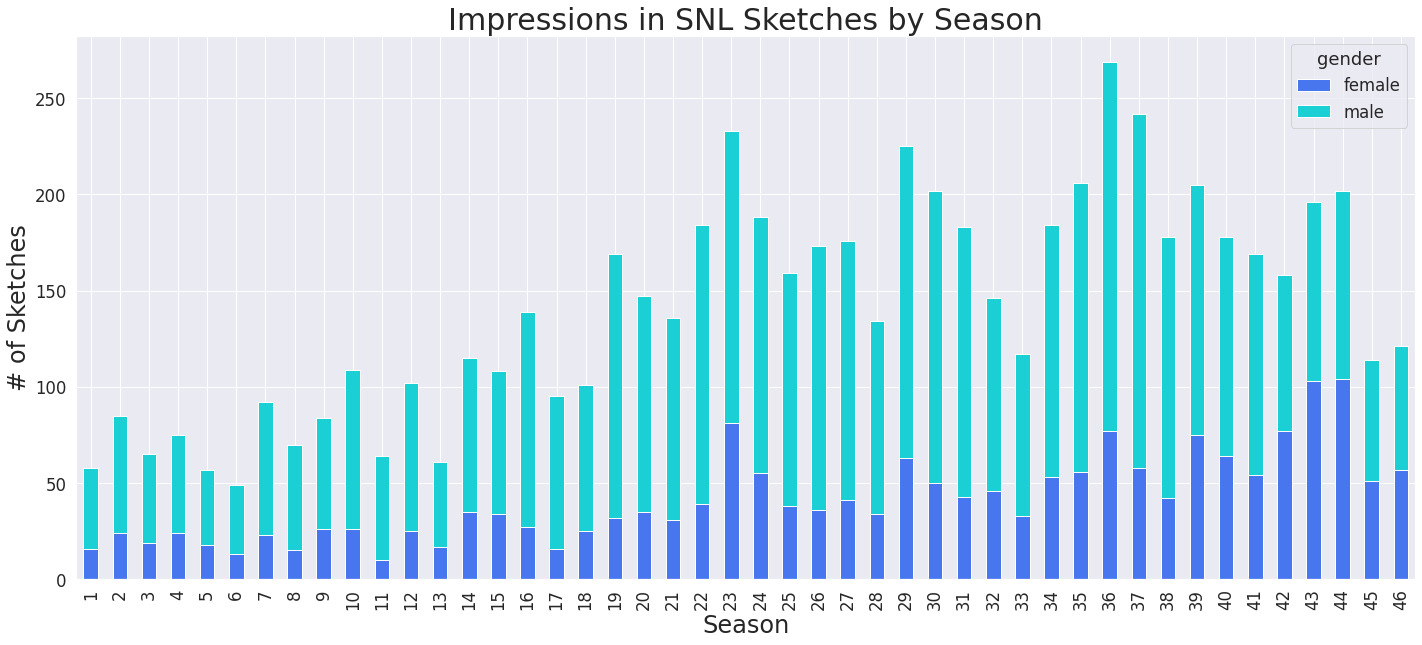

In [167]:
impress_plot.plot(kind='bar', stacked=True, figsize=(24,10)) # would be nicer if it was a percentage, because the # of 
# sketches each season varies
sns.set_palette(palette)
plt.title("Impressions in SNL Sketches by Season", fontsize = 30)
plt.xlabel('Season', fontsize=24)
plt.ylabel('# of Sketches', fontsize=24)
plt.show()

In [119]:
cast_impress.head()

,aid,tid,capacity,impid,sid,gender
32,Chris Redd,202104108,cast,4142.0,46,male
33,Beck Bennett,202104108,cast,4143.0,46,male
62,Pete Davidson,202104031,cast,4141.0,46,male
64,Chloe Fineman,202104031,cast,4057.0,46,female
66,Chris Redd,202104031,cast,4140.0,46,male


#### let's plot the top 20 impressions actors

In [120]:
top20imp = cast_impress.aid.value_counts().head(20)
top20imp

Darrell Hammond    444
Kenan Thompson     294
Kate McKinnon      253
Fred Armisen       215
Phil Hartman       182
Jason Sudeikis     164
Will Ferrell       159
Bill Hader         152
Dana Carvey        148
Taran Killam       148
Jay Pharoah        129
Cecily Strong      125
Kristen Wiig       122
Tim Meadows        120
Bobby Moynihan     120
Maya Rudolph       114
Amy Poehler        114
Beck Bennett       112
Joe Piscopo        108
Ana Gasteyer       104
Name: aid, dtype: int64

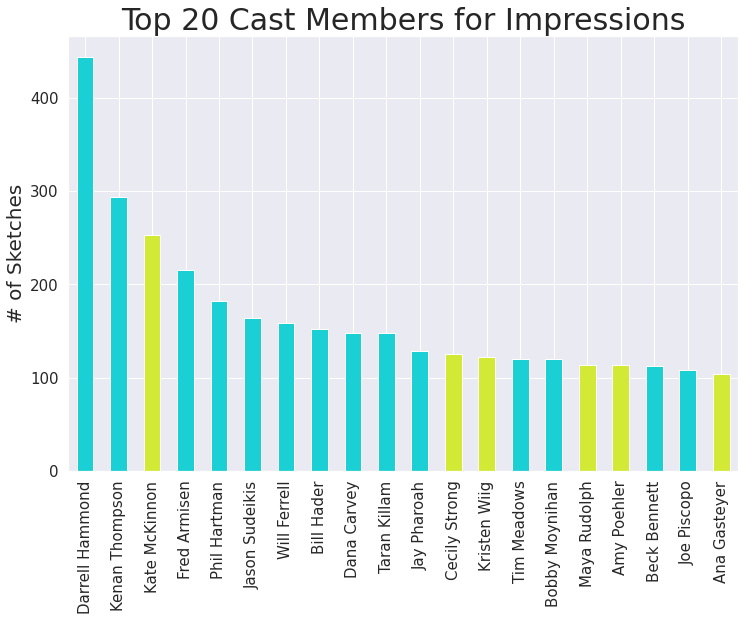

In [168]:
# plotting the females as teal and males as blue

c = [b,b,t,b,b,b,b,b,b,b,b,t,t,b,b,t,t, b, b,t ]

barlist = top20imp.plot.bar(x=[0], y=[1], fontsize = 15, figsize=(12,8), color=c)
plt.title("Top 20 Cast Members for Impressions", fontsize = 30)
plt.ylabel("# of Sketches", fontsize = 20)

#barlist[0].set_color('r')
plt.show()    
    
    #bar plot
#plt.bar(x, height = h, color = c)
 
#plt.show()

#### Conclusion for section 2:
Impressions are important for appearing in sketches, and there are some women in the top 20, with a female at #3. I noticed that the #1 person Darrell Hammond was someone who regularly impersonated some presidential figures including Bill Clinton and Al Gore. Also, some of the women on this graph have impersonated presidential figures such as Hillary Clinton and Kamala Harris.I wanted to explore the specific impressions of presidential figures in the next section, since SNL is known for their political sketches. 

# 3. How do women contribute to Presidential Impressions?
Since SNL is known for their political impressions, especially during elections, I wanted to explore the impressions of presidential and vice presidential candidates. I found a table that listed all candidates and took those that were after 1975, when SNL's first season aired. 

#### Getting List of Presidential Candidates

In [122]:

#Use pandas' `read_html` method to read the table from the URL below
pres_url = 'https://en.wikipedia.org/wiki/List_of_United_States_major_party_presidential_tickets'
pres = pd.read_html(pres_url)

In [123]:
pres = pres[0]

In [124]:
pres.head()

Unnamed: 0_level_0 Unnamed: 1_level_0  ... Results[3][c]   
                Year               T[d]  ...           EV%  R
0               2020                  C  ...          56.9  1
1               2020                  I  ...          43.1  2
2               2016                  O  ...          56.5  1
3               2016                  O  ...          42.2  2
4               2012                  I  ...          61.7  1

[5 rows x 16 columns]

In [125]:
pres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   (Unnamed: 0_level_0, Year)                125 non-null    object 
 1   (Unnamed: 1_level_0, T[d])                125 non-null    object 
 2   (Unnamed: 2_level_0, P)                   125 non-null    object 
 3   (Presidential nominee, Position[e])       125 non-null    object 
 4   (Presidential nominee, Name)              125 non-null    object 
 5   (Presidential nominee, S)                 125 non-null    object 
 6   (Presidential nominee, B)                 125 non-null    int64  
 7   (Presidential nominee, A[f])              125 non-null    int64  
 8   (Vice Presidential nominee, Position[e])  125 non-null    object 
 9   (Vice Presidential nominee, Name)         125 non-null    object 
 10  (Vice Presidential nominee, S)        

In [126]:
pres.index

RangeIndex(start=0, stop=125, step=1)

In [127]:
pres.columns

MultiIndex([(       'Unnamed: 0_level_0',        'Year'),
            (       'Unnamed: 1_level_0',        'T[d]'),
            (       'Unnamed: 2_level_0',           'P'),
            (     'Presidential nominee', 'Position[e]'),
            (     'Presidential nominee',        'Name'),
            (     'Presidential nominee',           'S'),
            (     'Presidential nominee',           'B'),
            (     'Presidential nominee',        'A[f]'),
            ('Vice Presidential nominee', 'Position[e]'),
            ('Vice Presidential nominee',        'Name'),
            ('Vice Presidential nominee',           'S'),
            ('Vice Presidential nominee',           'B'),
            ('Vice Presidential nominee',        'A[f]'),
            (            'Results[3][c]',         'PV%'),
            (            'Results[3][c]',         'EV%'),
            (            'Results[3][c]',           'R')],
           )

In [128]:
pres.columns = pres.columns.droplevel(0)

In [129]:
pres.columns

Index(['Year', 'T[d]', 'P', 'Position[e]', 'Name', 'S', 'B', 'A[f]',
       'Position[e]', 'Name', 'S', 'B', 'A[f]', 'PV%', 'EV%', 'R'],
      dtype='object')

In [130]:
pres = pres[['Year', 'Name']]

In [131]:
pres.head(30)

,Year,Name,Name
0,2020,Joe Biden,Kamala Harris
1,2020,Donald Trump,Mike Pence
2,2016,Donald Trump,Mike Pence
3,2016,Hillary Clinton,Tim Kaine
4,2012,Barack Obama,Joe Biden
5,2012,Mitt Romney,Paul Ryan
6,2008,Barack Obama,Joe Biden
7,2008,John McCain,Sarah Palin
8,2004,George W. Bush,Dick Cheney
9,2004,John Kerry,John Edwards


In [132]:
#lets drop everything after index 24

pres = pres.iloc[:25]

In [133]:
pres

,Year,Name,Name
0,2020,Joe Biden,Kamala Harris
1,2020,Donald Trump,Mike Pence
2,2016,Donald Trump,Mike Pence
3,2016,Hillary Clinton,Tim Kaine
4,2012,Barack Obama,Joe Biden
5,2012,Mitt Romney,Paul Ryan
6,2008,Barack Obama,Joe Biden
7,2008,John McCain,Sarah Palin
8,2004,George W. Bush,Dick Cheney
9,2004,John Kerry,John Edwards


In [134]:
pres.columns = ['Year','Pres', 'VP']

In [135]:
pres = pres.drop(columns='Year', axis=1)

In [136]:
pres.head()

,Pres,VP
0,Joe Biden,Kamala Harris
1,Donald Trump,Mike Pence
2,Donald Trump,Mike Pence
3,Hillary Clinton,Tim Kaine
4,Barack Obama,Joe Biden


In [137]:
pres_list = list(pres.Pres)
pres_list

['Joe Biden',
 'Donald Trump',
 'Donald Trump',
 'Hillary Clinton',
 'Barack Obama',
 'Mitt Romney',
 'Barack Obama',
 'John McCain',
 'George W. Bush',
 'John Kerry',
 'George W. Bush',
 'Al Gore',
 'Bill Clinton',
 'Bob Dole',
 'Bill Clinton',
 'George H. W. Bush',
 'Ross Perot',
 'George H. W. Bush',
 'Michael Dukakis',
 'Ronald Reagan',
 'Walter Mondale',
 'Ronald Reagan',
 'Jimmy Carter',
 'Jimmy Carter',
 'Gerald Ford']

In [138]:
vp = list(pres['VP'])
vp

['Kamala Harris',
 'Mike Pence',
 'Mike Pence',
 'Tim Kaine',
 'Joe Biden',
 'Paul Ryan',
 'Joe Biden',
 'Sarah Palin',
 'Dick Cheney',
 'John Edwards',
 'Dick Cheney',
 'Joe Lieberman',
 'Al Gore',
 'Jack Kemp',
 'Al Gore',
 'Dan Quayle',
 'James Stockdale',
 'Dan Quayle',
 'Lloyd Bentsen',
 'George H. W. Bush',
 'Geraldine Ferraro',
 'George H. W. Bush',
 'Walter Mondale',
 'Walter Mondale',
 'Bob Dole']

In [139]:
for v in vp:
    pres_list.append(v)

In [140]:
pres_list

['Joe Biden',
 'Donald Trump',
 'Donald Trump',
 'Hillary Clinton',
 'Barack Obama',
 'Mitt Romney',
 'Barack Obama',
 'John McCain',
 'George W. Bush',
 'John Kerry',
 'George W. Bush',
 'Al Gore',
 'Bill Clinton',
 'Bob Dole',
 'Bill Clinton',
 'George H. W. Bush',
 'Ross Perot',
 'George H. W. Bush',
 'Michael Dukakis',
 'Ronald Reagan',
 'Walter Mondale',
 'Ronald Reagan',
 'Jimmy Carter',
 'Jimmy Carter',
 'Gerald Ford',
 'Kamala Harris',
 'Mike Pence',
 'Mike Pence',
 'Tim Kaine',
 'Joe Biden',
 'Paul Ryan',
 'Joe Biden',
 'Sarah Palin',
 'Dick Cheney',
 'John Edwards',
 'Dick Cheney',
 'Joe Lieberman',
 'Al Gore',
 'Jack Kemp',
 'Al Gore',
 'Dan Quayle',
 'James Stockdale',
 'Dan Quayle',
 'Lloyd Bentsen',
 'George H. W. Bush',
 'Geraldine Ferraro',
 'George H. W. Bush',
 'Walter Mondale',
 'Walter Mondale',
 'Bob Dole']

#### Now that we have list of presidential candidates, let's create a df of cast impressions of these candidates:

In [141]:
# checking out cast_impress df
cast_impress

,aid,tid,capacity,impid,sid,gender
32,Chris Redd,202104108,cast,4142.0,46,male
33,Beck Bennett,202104108,cast,4143.0,46,male
62,Pete Davidson,202104031,cast,4141.0,46,male
64,Chloe Fineman,202104031,cast,4057.0,46,female
66,Chris Redd,202104031,cast,4140.0,46,male
...,...,...,...,...,...,...
55062,Chevy Chase,197511158,cast,5.0,1,male
55066,John Belushi,197511159,cast,6.0,1,male
55104,Chevy Chase,197511081,cast,3.0,1,male
55189,Laraine Newman,197510257,cast,1.0,1,female


In [142]:
cast_impress.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6523 entries, 32 to 55204
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aid       6523 non-null   object
 1   tid       6523 non-null   object
 2   capacity  6523 non-null   object
 3   impid     6523 non-null   object
 4   sid       6523 non-null   int64 
 5   gender    6523 non-null   object
dtypes: int64(1), object(5)
memory usage: 356.7+ KB


In [143]:
# editing the impid column because of the .0 
cast_impress.impid = cast_impress.impid.str.strip('.0')

In [144]:
cast_impress.head()
# now we can merge with the other df

,aid,tid,capacity,impid,sid,gender
32,Chris Redd,202104108,cast,4142,46,male
33,Beck Bennett,202104108,cast,4143,46,male
62,Pete Davidson,202104031,cast,4141,46,male
64,Chloe Fineman,202104031,cast,4057,46,female
66,Chris Redd,202104031,cast,414,46,male


In [145]:
# checking out imp_gen df
imp_gen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4115 entries, 0 to 4114
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   impid   4115 non-null   object
 1   aid     4115 non-null   object
 2   name    4115 non-null   object
 3   type    3501 non-null   object
 4   gender  3501 non-null   object
dtypes: object(5)
memory usage: 192.9+ KB


In [146]:
# drop redundant columns on imp_gen
imp_gen2 = imp_gen.drop(columns=['aid', 'type', 'gender'])

In [147]:
#check imp_gen2
imp_gen2.sample(13)

,impid,name
3178,992,James Stockdale
3787,368,Leslie Uggams
1242,2885,Meryl Streep
920,3311,Bob Ley
662,3546,Bill Belichick
836,3419,Slash
3448,732,George Burns
206,3575,Brooke Baldwin
2112,2093,Nicki Hilton
1756,2455,Desi Arnaz


In [148]:
# Merging cast_impress with imp_gen2 
cast_imp_gen = pd.merge(cast_impress, imp_gen2, how='left', on='impid')

In [149]:
cast_imp_gen.head(13)

,aid,tid,capacity,impid,sid,gender,name
0,Chris Redd,202104108,cast,4142,46,male,Barack Obama
1,Beck Bennett,202104108,cast,4143,46,male,Bruce Springsteen
2,Pete Davidson,202104031,cast,4141,46,male,Matt Gaetz
3,Chloe Fineman,202104031,cast,4057,46,female,Britney Spears
4,Chris Redd,202104031,cast,414,46,male,Ron Hendren
5,Mikey Day,202103273,cast,4134,46,male,Sean Evans
6,Aidy Bryant,202103275,cast,4121,46,female,Ted Cruz
7,Chloe Fineman,202103275,cast,4136,46,female,Ella Emhoff
8,Alex Moffat,202103275,cast,4096,46,male,Joe Biden
9,Cecily Strong,202103275,cast,41,46,female,"William Shatner , Captain Kirk"


In [150]:
cast_imp_gen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6523 entries, 0 to 6522
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aid       6523 non-null   object
 1   tid       6523 non-null   object
 2   capacity  6523 non-null   object
 3   impid     6523 non-null   object
 4   sid       6523 non-null   int64 
 5   gender    6523 non-null   object
 6   name      6506 non-null   object
dtypes: int64(1), object(6)
memory usage: 407.7+ KB


In [151]:
len(cast_imp_gen.name.unique())

2405

In [152]:
cast_imp_gen.sample(13)

,aid,tid,capacity,impid,sid,gender,name
3426,Maya Rudolph,2002100513,cast,1929,28,female,Donatella Versace
511,Mikey Day,201803108,cast,37,43,male,"Nichelle Nichols , Uhura"
2064,Kenan Thompson,201003139,cast,2718,35,male,Whoopi Goldberg
4349,Norm MacDonald,199709271,cast,1476,23,male,Marv Albert
6207,Bill Murray,198002164,cast,201,5,male,Ted Kennedy
1486,Jason Sudeikis,201210136,cast,2931,38,male,Mel Gibson
3069,Horatio Sanz,200410028,cast,1778,30,male,Elton John
1260,Bobby Moynihan,201312143,cast,3399,39,male,Richard Harrison
6151,Joe Piscopo,198101241,cast,264,6,male,Ted Koppel
1476,Jason Sudeikis,201210132,cast,2627,38,male,Dane Cook


In [153]:
# checking that we have our pres_list
print(len(pres_list))
pres_list


50


['Joe Biden',
 'Donald Trump',
 'Donald Trump',
 'Hillary Clinton',
 'Barack Obama',
 'Mitt Romney',
 'Barack Obama',
 'John McCain',
 'George W. Bush',
 'John Kerry',
 'George W. Bush',
 'Al Gore',
 'Bill Clinton',
 'Bob Dole',
 'Bill Clinton',
 'George H. W. Bush',
 'Ross Perot',
 'George H. W. Bush',
 'Michael Dukakis',
 'Ronald Reagan',
 'Walter Mondale',
 'Ronald Reagan',
 'Jimmy Carter',
 'Jimmy Carter',
 'Gerald Ford',
 'Kamala Harris',
 'Mike Pence',
 'Mike Pence',
 'Tim Kaine',
 'Joe Biden',
 'Paul Ryan',
 'Joe Biden',
 'Sarah Palin',
 'Dick Cheney',
 'John Edwards',
 'Dick Cheney',
 'Joe Lieberman',
 'Al Gore',
 'Jack Kemp',
 'Al Gore',
 'Dan Quayle',
 'James Stockdale',
 'Dan Quayle',
 'Lloyd Bentsen',
 'George H. W. Bush',
 'Geraldine Ferraro',
 'George H. W. Bush',
 'Walter Mondale',
 'Walter Mondale',
 'Bob Dole']

In [154]:
# Creating the pres_imp df: a df of cast impressions of presidential candidates
pres_imp = pd.DataFrame(columns=cast_imp_gen.columns)

for candidate in pres_list:
    
    pres_imp = pd.concat([pres_imp, cast_imp_gen.loc[cast_imp_gen['name'] == candidate]])

In [155]:
pres_imp.head(13)

,aid,tid,capacity,impid,sid,gender,name
8,Alex Moffat,202103275,cast,4096,46,male,Joe Biden
69,Alex Moffat,202012191,cast,4096,46,male,Joe Biden
1423,Jason Sudeikis,2013012614,cast,2638,38,male,Joe Biden
1475,Jason Sudeikis,201210131,cast,2638,38,male,Joe Biden
1528,Jason Sudeikis,201205121,cast,2638,37,male,Joe Biden
1599,Jason Sudeikis,2012021810,cast,2638,37,male,Joe Biden
1630,Jason Sudeikis,201201147,cast,2638,37,male,Joe Biden
1897,Jason Sudeikis,201012181,cast,2638,36,male,Joe Biden
1934,Jason Sudeikis,201012041,cast,2638,36,male,Joe Biden
1970,Jason Sudeikis,201010301,cast,2638,36,male,Joe Biden


In [156]:
pres_imp.sample(13)

,aid,tid,capacity,impid,sid,gender,name
3710,Darrell Hammond,200012095,cast,1724,26,male,Al Gore
611,Beck Bennett,201710141,cast,3703,43,male,Mike Pence
1085,Jay Pharoah,201411151,cast,3227,40,male,Barack Obama
2974,Darrell Hammond,200502058,cast,1721,30,male,Donald Trump
1630,Jason Sudeikis,201201147,cast,2638,37,male,Joe Biden
2846,Darrell Hammond,200510081,cast,1872,31,male,Dick Cheney
3518,Will Ferrell,200201191,cast,1725,27,male,George W. Bush
817,Kate McKinnon,201604091,cast,3352,41,female,Hillary Clinton
6359,Bill Murray,197801211,cast,119,3,male,Walter Mondale
5717,Randy Quaid,198605173,cast,521,11,male,Ronald Reagan


In [157]:
len(pres_imp.name.unique())

28

In [158]:
# 28 unique president candidates. 
# this is ok, because SNL did not necessarily do sketches about all of these candidates

In [159]:
pres_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1183 entries, 8 to 4674
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aid       1183 non-null   object
 1   tid       1183 non-null   object
 2   capacity  1183 non-null   object
 3   impid     1183 non-null   object
 4   sid       1183 non-null   object
 5   gender    1183 non-null   object
 6   name      1183 non-null   object
dtypes: object(7)
memory usage: 73.9+ KB


In [160]:
pres_imp.shape

(1183, 7)

In [161]:
# lets group by gender and season id so we can stack the bar plot
pres_plot = pres_imp.groupby(['gender', 'sid']).size().reset_index().pivot(columns='gender', index='sid', values=0)
pres_plot.head()

gender,female,male
sid,,
1,NaN,17.0
2,NaN,25.0
3,NaN,17.0
4,NaN,15.0
5,NaN,4.0


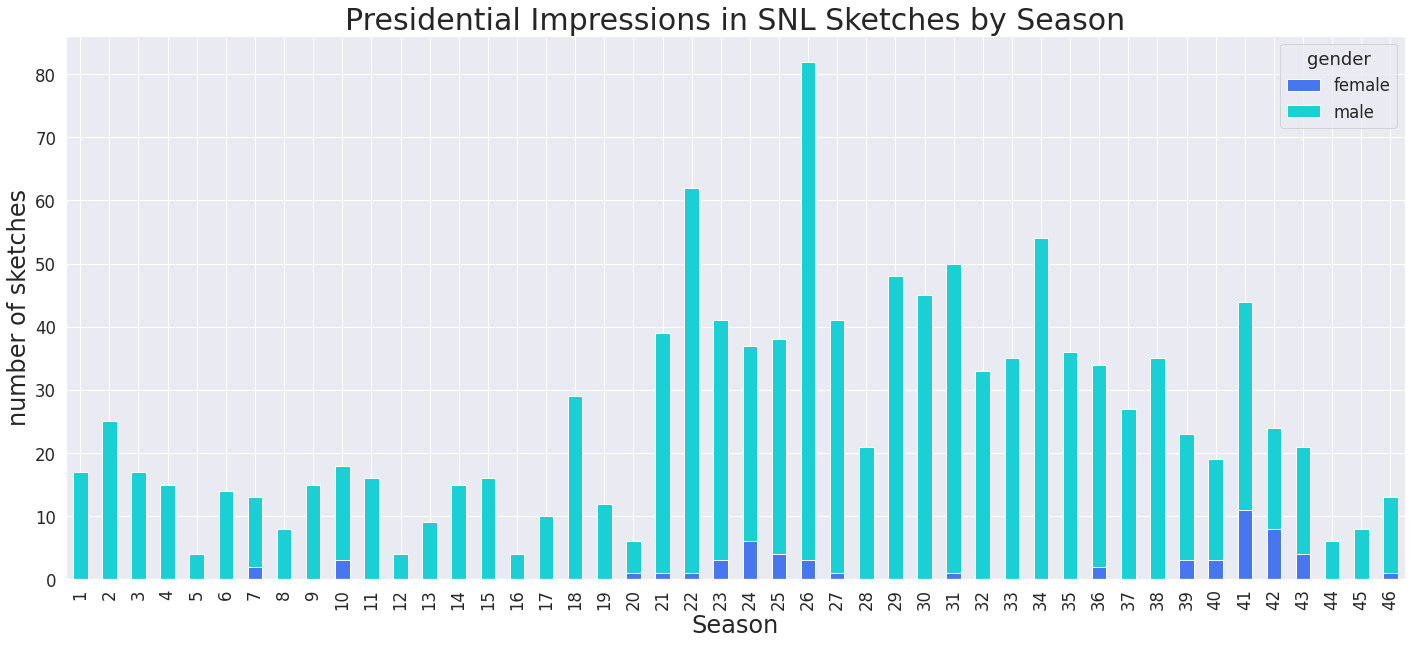

In [162]:
pres_plot.plot(kind='bar', stacked=True, figsize=(24,10)) # would be nicer if it was a percentage, because the # of 
# sketches each season varies
sns.set_palette(palette)
plt.title("Presidential Impressions in SNL Sketches by Season", fontsize = 30)
plt.xlabel('Season', fontsize=24)
plt.ylabel('number of sketches', fontsize=24)
plt.show()

In [163]:
women = pres_imp[pres_imp['gender']=='female']
women.sample(13)

,aid,tid,capacity,impid,sid,gender,name
4226,Ana Gasteyer,199802076,cast,1519,23,female,Hillary Clinton
4097,Ana Gasteyer,199810031,cast,1519,24,female,Hillary Clinton
4288,Ana Gasteyer,199711151,cast,1519,23,female,Hillary Clinton
729,Kate McKinnon,201612036,cast,3352,42,female,Hillary Clinton
926,Kate McKinnon,201510171,cast,3352,41,female,Hillary Clinton
844,Kate McKinnon,201603051,cast,3352,41,female,Hillary Clinton
613,Kate McKinnon,201710144,cast,3352,43,female,Hillary Clinton
3767,Ana Gasteyer,2000101410,cast,1519,26,female,Hillary Clinton
1333,Vanessa Bayer,201310056,cast,3015,39,female,Hillary Clinton
750,Kate McKinnon,201610151,cast,3352,42,female,Hillary Clinton


In [164]:
top10pres = pres_imp.aid.value_counts().head(10)
top10pres

Darrell Hammond    353
Jason Sudeikis     102
Fred Armisen        66
Phil Hartman        66
Will Ferrell        65
Will Forte          53
Dan Aykroyd         52
Jay Pharoah         50
Norm MacDonald      50
Beck Bennett        46
Name: aid, dtype: int64

In [165]:
# no women in top 10, lets try top 20
top20pres = pres_imp.aid.value_counts().head(20)
top20pres

Darrell Hammond    353
Jason Sudeikis     102
Fred Armisen        66
Phil Hartman        66
Will Ferrell        65
Will Forte          53
Dan Aykroyd         52
Jay Pharoah         50
Norm MacDonald      50
Beck Bennett        46
Joe Piscopo         36
Kate McKinnon       28
Chris Parnell       21
Randy Quaid         16
Chevy Chase         16
Ana Gasteyer        16
Seth Meyers         15
Dana Carvey         11
Taran Killam        11
Jeff Renaudo        10
Name: aid, dtype: int64

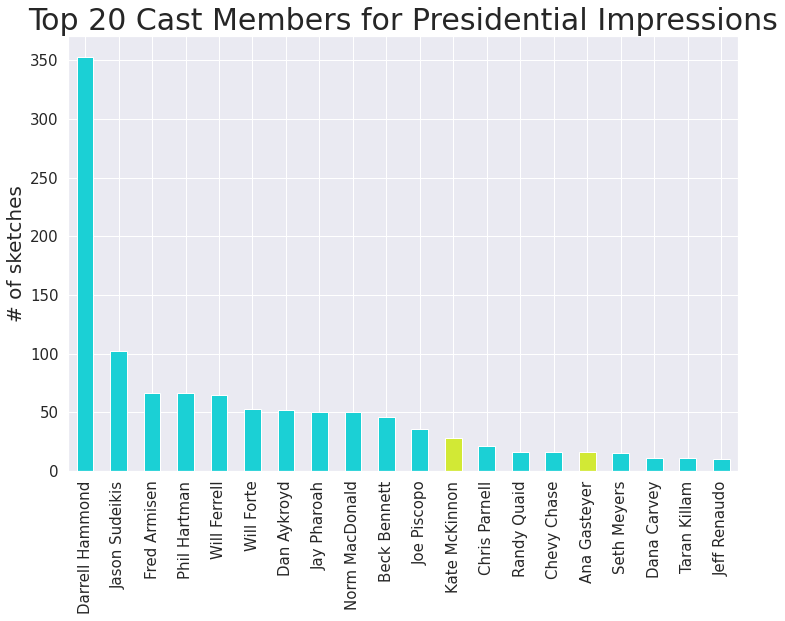

In [166]:
# plotting the females as teal and males as blue

c = [b,b,b,b,b,b,b,b,b,b,b, t,b,b,b,t, b, b,b,b ]

barlist = top20pres.plot.bar(x=[0], y=[1], fontsize = 15, figsize=(12,8), color=c)
plt.title("Top 20 Cast Members for Presidential Impressions", fontsize = 30)
plt.ylabel("# of sketches", fontsize = 20)

#barlist[0].set_color('r')
plt.show()    
    
    #bar plot
#plt.bar(x, height = h, color = c)
 
#plt.show()

#### Conclusion for section 3:
The top 20 presidential impressions graph is the most disheartening of the graphs, with only two females. Both have impersonated Hillary Clinton, as well as other political but not necessarily presidential candidates. This graph probably more reflects the lack of females in the political arena compared to males. 

## Conclusion:

From this study, it is apparent that there is an unequal representation of women in the SNL cast in terms of appearances in sketches. While it seems many of the females can do as many impressions as the males, it seems that they could still be used more on camera. Adding the political component also reflects a possible lack of women in real life prominent political roles. In this study I only took into account presidential and vice presidential candidates of which there are not many women. An interesting expansion to this work would be to evaluate other political figures such as congresswomen and senators, etc. From watching the show regularly, I can estimate that there are more women being featured in these roles than what is reflected in the presidential impressions graph. There are even women cast members who frequently impersonate male political figures. While growing up watching the show, I noticed there were more males impersonating female characters. Now, It is interesting to see this trend flipping. Another interesting expansion to this study would be to assess the ethnic diversity of the cast members over time, as this has been a topic of frequent scrutiny.